In [21]:
import contextlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm
from src import utils
import seaborn as sns

In [22]:
def _mkdir(root_path, folder_name):
    """Creates a folder at current path"""
    # logger = logging.getLogger(self.logger_name)
    cur_dir = os.path.join(root_path, folder_name)
    with contextlib.suppress(FileExistsError):
        os.mkdir(cur_dir)
        # logger.info(f"Entering folder: /{folder_name}")
def _make_folders(root_path, folders):
        """Make the initial folders"""
        for folder in folders:
            _mkdir(root_path, folder)
            root_path = os.path.join(root_path, folder)
        return root_path

In [23]:
# Project path
project_dir = os.path.abspath('')[:-9]
# Load enviromental variables

env_var = utils.load_env_variables(project_dir)
env_var["root_path"] = "/home/tpinho/IJGIS/Datasets/Australia_Election_2019"

In [24]:
datasets_single = ["Brazil_Election_2018"]
few_methods = ["CrossValidation", "Optimistic", "TraditionalSCV"]

datasets = ["Brazil_Election_2018_Sampled_dec0.3_prob0.1",      
            "Brazil_Election_2018_Sampled_dec0.3_prob0.2",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.3",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.4",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.5",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.6",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.7",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.8",
            "Brazil_Election_2018_Sampled_dec0.3_prob0.9",
            ]

us_corn_datasets = ["US_Corn_Yield_2016_Removed_ALABAMA",
                "US_Corn_Yield_2016_Removed_ARKANSAS",
                "US_Corn_Yield_2016_Removed_CALIFORNIA",
                "US_Corn_Yield_2016_Removed_COLORADO",
                "US_Corn_Yield_2016_Removed_DELAWARE",
                "US_Corn_Yield_2016_Removed_GEORGIA",
                "US_Corn_Yield_2016_Removed_IDAHO",
                "US_Corn_Yield_2016_Removed_ILLINOIS",
                "US_Corn_Yield_2016_Removed_INDIANA",
                "US_Corn_Yield_2016_Removed_IOWA",
                "US_Corn_Yield_2016_Removed_KANSAS",
                "US_Corn_Yield_2016_Removed_KENTUCKY",
                "US_Corn_Yield_2016_Removed_LOUISIANA",
                "US_Corn_Yield_2016_Removed_MARYLAND",
                "US_Corn_Yield_2016_Removed_MICHIGAN",
                "US_Corn_Yield_2016_Removed_MINNESOTA",
                "US_Corn_Yield_2016_Removed_MISSISSIPPI",
                "US_Corn_Yield_2016_Removed_MISSOURI",
                "US_Corn_Yield_2016_Removed_MONTANA",
                "US_Corn_Yield_2016_Removed_NEBRASKA",
                "US_Corn_Yield_2016_Removed_NEW JERSEY",
                "US_Corn_Yield_2016_Removed_NEW MEXICO",
                "US_Corn_Yield_2016_Removed_NEW YORK",
                "US_Corn_Yield_2016_Removed_NORTH CAROLINA",
                "US_Corn_Yield_2016_Removed_NORTH DAKOTA",
                "US_Corn_Yield_2016_Removed_OHIO",
                "US_Corn_Yield_2016_Removed_OKLAHOMA",
                "US_Corn_Yield_2016_Removed_PENNSYLVANIA",
                "US_Corn_Yield_2016_Removed_SOUTH CAROLINA",
                "US_Corn_Yield_2016_Removed_SOUTH DAKOTA",
                "US_Corn_Yield_2016_Removed_TENNESSEE",
                "US_Corn_Yield_2016_Removed_TEXAS",
                "US_Corn_Yield_2016_Removed_VIRGINIA",
                "US_Corn_Yield_2016_Removed_WEST VIRGINIA",
                "US_Corn_Yield_2016_Removed_WISCONSIN",
                "US_Corn_Yield_2016_Removed_WYOMING"]
                
us_corn_datasets = ["US_Corn_Yield_2016_Removed_Northeast",
                    "US_Corn_Yield_2016_Removed_Southeast",
                    "US_Corn_Yield_2016_Removed_Midwest",
                    "US_Corn_Yield_2016_Removed_Southwest",
                    "US_Corn_Yield_2016_Removed_West"]

us_wheat_datasets = ["US_Wheat_2014_Removed_Kansas",
                    "US_Wheat_2014_Removed_Montana",
                    "US_Wheat_2014_Removed_Oklahoma",
                    "US_Wheat_2014_Removed_Texas",
                    "US_Wheat_2014_Removed_Washington"]

australia_datasets = ["Australia_Election_2019_Sampled_dec0.05_prob0.1",
                "Australia_Election_2019_Sampled_dec0.05_prob0.2",
                "Australia_Election_2019_Sampled_dec0.05_prob0.3",
                "Australia_Election_2019_Sampled_dec0.05_prob0.4",
                "Australia_Election_2019_Sampled_dec0.05_prob0.5",
                "Australia_Election_2019_Sampled_dec0.05_prob0.6",
                "Australia_Election_2019_Sampled_dec0.05_prob0.7",
                "Australia_Election_2019_Sampled_dec0.05_prob0.8",
                "Australia_Election_2019_Sampled_dec0.05_prob0.9"]

scv_methods = ["CrossValidation",
               "Optimistic",
               "RegGBSCV_R_Kappa_0.0",
               "RegGBSCV_R_Kappa_0.1",
               "RegGBSCV_R_Kappa_0.2",
               "RegGBSCV_R_Kappa_0.3",  
               "RegGBSCV_R_Kappa_0.4",
               "RegGBSCV_R_Kappa_0.5",
               #"RegGBSCV_R_Kappa_0.6",
               #"RegGBSCV_R_Kappa_0.7", 
               #"RegGBSCV_R_Kappa_0.8",
               #"RegGBSCV_R_Kappa_0.9",
               #"RegGBSCV_R_Kappa_1.0",
               "TraditionalSCV"]

Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.1


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.2


100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.3


100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.4


100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.5


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.6


100%|██████████| 10/10 [00:04<00:00,  2.24it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.7


100%|██████████| 10/10 [00:04<00:00,  2.22it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.8


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


Dataset: Brazil_Election_2018_Sampled_dec0.3_prob0.9


100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


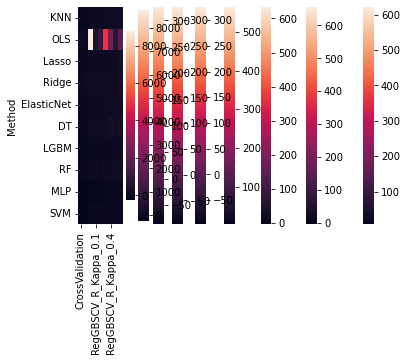

In [25]:
fs_method = "CFS"
ml_methods = ["KNN", "OLS", "Lasso", "Ridge", "ElasticNet", "DT", "LGBM", "RF", "MLP", "SVM"]
data_id = "INDEX"



for dataset_folder in australia_datasets:
    rmse_mean = {}
    rmse_methods = pd.DataFrame(index=ml_methods, columns=scv_methods, dtype="float")
    print(f"Dataset: {dataset_folder}")
    dataset_path = os.path.join(env_var["root_path"], dataset_folder)
    out_sample = pd.read_csv(os.path.join(dataset_path, "out_of_sample_error.csv"), index_col="methods")
    #scv_methods = list(os.listdir(os.path.join(dataset_path, "results")))
    #rmse_mean["Dataset"] = rmse_mean["Dataset"] + [dataset_folder] if rmse_mean.get("Dataset") else [dataset_folder]
    #scv_methods = ["RegGBSCV_R_Kappa_2.0"]
    for ml_method in tqdm(ml_methods):
        rmse_mean["Method"] = rmse_mean["Method"] + [ml_method] if rmse_mean.get("Method") else [ml_method]
        for scv_method in scv_methods:
            predictions_path = os.path.join(dataset_path, "results", scv_method, "predictions", fs_method, f"{ml_method}")
            predi_files = [os.path.join(predictions_path,c) for c in os.listdir(predictions_path)]
            predictions = pd.DataFrame()
            for file in predi_files:
                pred_fold = pd.read_csv(file)
                predictions = pd.concat([predictions, pred_fold])
            predictions["fold"] = predictions[data_id].apply(lambda cod: str(cod)[:2])
            predictions["error"] = (predictions["PREDICTIONS"] - predictions["GROUND_TRUTH"])**2
            predictions = predictions.groupby(by="fold").agg("mean")
            rmse_mean[f"{scv_method}"] = rmse_mean[f"{scv_method}"] +[predictions["error"].mean()] if rmse_mean.get(f"{scv_method}") else [predictions["error"].mean()]
            #rmse_mean[f"{scv_method}_std"] = rmse_mean[f"{scv_method}_std"] +[predictions["error"].std()] if rmse_mean.get(f"{scv_method}_std") else [predictions["error"].std()]
    _make_folders(os.path.join(env_var["root_path"], dataset_folder), ["comparison"])
    df_rmse = pd.DataFrame(rmse_mean)
    df_rmse.set_index("Method", inplace=True)

    df_rmse.to_csv(os.path.join(env_var["root_path"], dataset_folder, "comparison", "RMSE.csv"))
    df_rmse.rank().to_csv(os.path.join(env_var["root_path"], dataset_folder, "comparison", "Rank.csv"))
    rmse_methods = df_rmse.sub(out_sample["mean"], axis="index")
    rmse_methods.to_csv(os.path.join(env_var["root_path"], dataset_folder, "comparison", "RMSE_DIFF.csv"))
    fig = sns.heatmap(rmse_methods)
    fig.figure.savefig(os.path.join(env_var["root_path"], dataset_folder, "comparison", "RMSE_DIFF.jpg"))

